In [1]:
import numpy as np
import matplotlib.pyplot as plt
import opt_einsum as oe
import sys
sys.path.append('/path/to/hydro_glasses/')
from time import time

In [2]:
from hydro_glass import lanczos,test_lanczos

In [3]:
def lorentzian(omega, omega_n, gamma):
    return gamma/np.pi/(gamma**2 + (omega-omega_n)**2)



Example continued fractions

In [4]:
a_coefficients = [1,1,1,1,1,1,1,1,1,1,1]
b_coefficients = [1,1,1,1,1,1,1,1,1,1,1]
value = lanczos.continued_fraction(a_coefficients, b_coefficients)
print(value,'golden ratio ={}'.format( (1+np.sqrt(5) ) /2 ))


1.6180555555555556 golden ratio =1.618033988749895


Load Dynmat

In [5]:
dynmat=np.load('dynmat.npy')
dynmat=dynmat[0,:,:,0,:,:]
n_modes=dynmat.shape[0]*dynmat.shape[1]
dynmat=dynmat.reshape([n_modes,n_modes])

In [6]:
eigen=np.load('ald/_eigensystem.npy')[0,:,:]
w2=np.real(eigen[0,:])
eig_vec=eigen[1:,:]

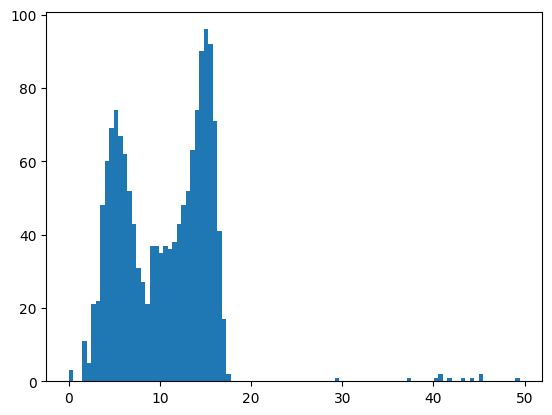

In [7]:
nu=np.sign(w2)*np.sqrt(np.abs(w2))/2/np.pi
plt.hist(nu,bins=100)
plt.show()

# Test lanczos

Lanczos with diagonalization from enrico

In [8]:
N=1000
A=np.random.random((N,N))
A=(A+A.T)/2
w,v=np.linalg.eigh(A)
np.linalg.norm(A@v[:,3]),w[3]
u=v[:,3]+v[:,10]


1.0707933902740479


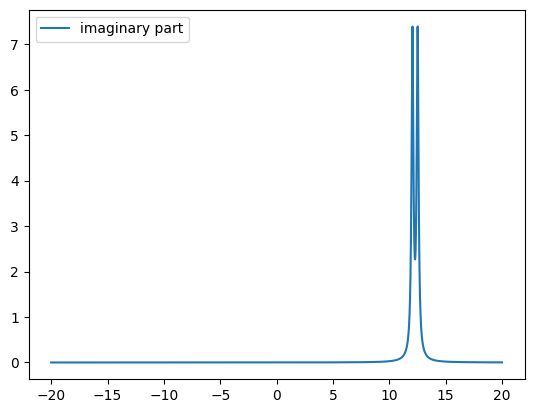

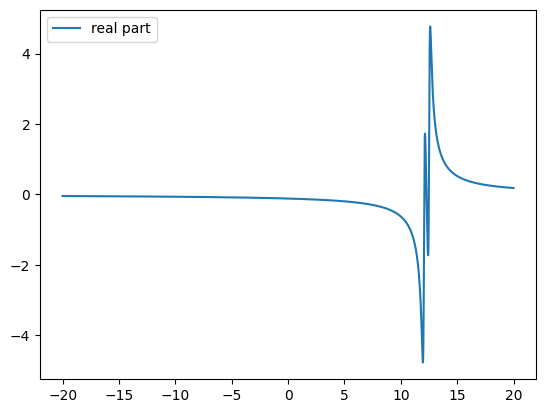

In [9]:
start=time()
_=test_lanczos.compute_spectrum(A=-A, u=u, nsteps=20, fmin=-20, fmax=20, nfreq=10000, eta=1.0e-1, plot=True)
end=time()
print(end-start)

/path/to/hydro_glasses/hydro_glass/lanczos.py:58: ComplexWarning: Casting complex values to real discards the imaginary part
  alpha_array[j] = alpha


0.49916577339172363


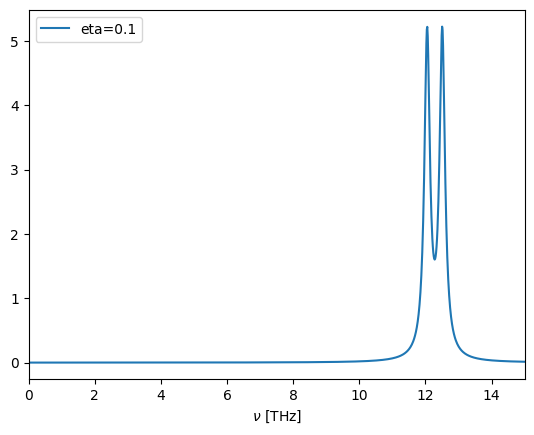

In [10]:
omega_array=np.linspace(0,20,10000)
y=np.zeros_like(omega_array,dtype=complex)
fig,ax=plt.subplots()

eta_range=[0.1]
start=time()
for eta in eta_range:
    x,y=lanczos.spectrum(A=-A, v=u, k=20,omega_array=omega_array,eta=eta)
    ax.plot(x**2,y,label='eta={}'.format(eta) )
end=time()
plt.xlabel('$\\nu$ [THz]')
plt.xlim(0,15)
plt.legend()
print(end-start)

Cheap Lanczos, spectral decomposition from Dynmat eigenvectors

In [11]:
i_vec=0
intervallo=1510
phi=np.zeros_like(eig_vec[:,0])
for i in range(intervallo):
    phi=phi+eig_vec[:,i_vec+i]
    #print(np.sqrt(w2[i_vec+i]) )
#alpha,beta=lanczos.lanczos_cheap(dynmat,phi,100)
#print(np.sqrt(w2[i_vec]) )

4.502086162567139


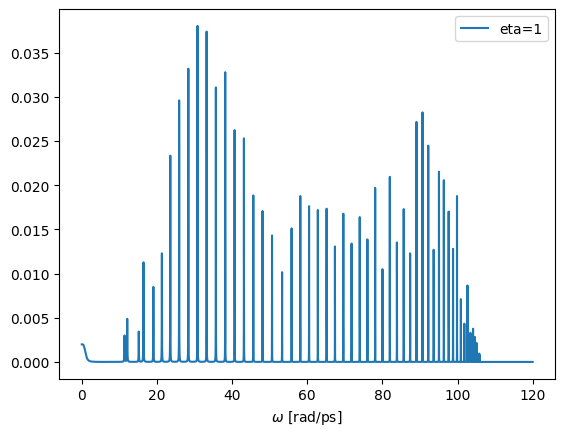

In [13]:
omega_array=np.linspace(0,120,10000)
y=np.zeros_like(omega_array,dtype=complex)
fig,ax=plt.subplots()

eta_range=[1]
start=time()
for eta in eta_range:
    x,y=lanczos.spectrum(A=dynmat, v=phi, k=100,omega_array=omega_array,eta=eta)
    ax.plot(x,y,label='eta={}'.format(eta) )
end=time()
plt.xlabel('$\omega$ [rad/ps]')
#plt.xlim(0,15)
plt.legend()
print(end-start)